In [5]:
import pandas as pd
import numpy as np
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

import matplotlib.pyplot as plt
%matplotlib inline

import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [7]:
from nltk import bigrams, word_tokenize
from nltk.util import ngrams

sentence = "I am a boy."
tokens = word_tokenize(sentence)
tokens

['I', 'am', 'a', 'boy', '.']

In [8]:
bigram = bigrams(tokens)
trigram = ngrams(tokens, 3)

print('bigram: ')
for t in bigram:
    print(t)

print('\ntrigram : ')
for t in trigram:
    print(t)

bigram: 
('I', 'am')
('am', 'a')
('a', 'boy')
('boy', '.')

trigram : 
('I', 'am', 'a')
('am', 'a', 'boy')
('a', 'boy', '.')


In [9]:
bigram = ngrams(tokens, 2, pad_left=True, pad_right=True, left_pad_symbol="SS", right_pad_symbol="SE")
for t in bigram :
    print(t)

('SS', 'I')
('I', 'am')
('am', 'a')
('a', 'boy')
('boy', '.')
('.', 'SE')


In [10]:
from nltk import ConditionalFreqDist
bigram = ngrams(tokens, 2, pad_left=True, pad_right=True, left_pad_symbol="SS", right_pad_symbol="SE")
cfd = ConditionalFreqDist([(t[0], t[1]) for t in bigram])
cfd

<ConditionalFreqDist with 6 conditions>

In [11]:
cfd.conditions()

['SS', 'I', 'am', 'a', 'boy', '.']

In [12]:
cfd["SS"]

FreqDist({'I': 1})

In [13]:
import nltk

In [14]:
nltk.download('movie_reviews')
nltk.download('punkt')
from nltk.corpus import movie_reviews

[nltk_data] Downloading package movie_reviews to C:\Users\choi
[nltk_data]     yeseul\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

[nltk_data] Downloading package punkt to C:\Users\choi
[nltk_data]     yeseul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
sentences =[]
for tokens in movie_reviews.sents() :
    bigram = ngrams(tokens, 2, pad_left = True, pad_right = True, left_pad_symbol="SS", right_pad_symbol="SE")
    sentences+=[t for t in bigram]
    
sentences[:20]

[('SS', 'plot'),
 ('plot', ':'),
 (':', 'two'),
 ('two', 'teen'),
 ('teen', 'couples'),
 ('couples', 'go'),
 ('go', 'to'),
 ('to', 'a'),
 ('a', 'church'),
 ('church', 'party'),
 ('party', ','),
 (',', 'drink'),
 ('drink', 'and'),
 ('and', 'then'),
 ('then', 'drive'),
 ('drive', '.'),
 ('.', 'SE'),
 ('SS', 'they'),
 ('they', 'get'),
 ('get', 'into')]

In [19]:
movie_reviews.sents()

[['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.'], ['they', 'get', 'into', 'an', 'accident', '.'], ...]

In [20]:
cfd = ConditionalFreqDist(sentences)

In [21]:
cfd["SS"].most_common(5)

[('the', 8071), ('.', 3173), ('it', 3136), ('i', 2471), ('but', 1814)]

<AxesSubplot:>

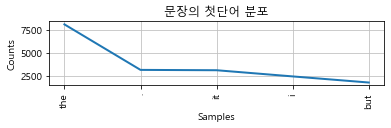

<AxesSubplot:title={'center':'문장의 첫단어 분포'}, xlabel='Samples', ylabel='Counts'>

<AxesSubplot:>

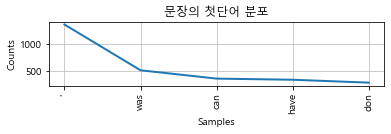

<AxesSubplot:title={'center':'문장의 첫단어 분포'}, xlabel='Samples', ylabel='Counts'>

<AxesSubplot:>

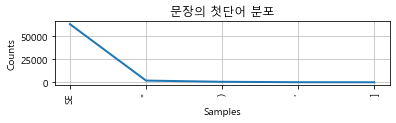

<AxesSubplot:title={'center':'문장의 첫단어 분포'}, xlabel='Samples', ylabel='Counts'>

In [23]:
plt.subplot(311)
cfd["SS"].plot(5, title = "문장의 첫단어 분포")
plt.subplot(312)
cfd["i"].plot(5, title = "문장의 첫단어 분포")
plt.subplot(312)
cfd["."].plot(5, title = "문장의 첫단어 분포")

In [25]:
from nltk.probability import ConditionalProbDist, MLEProbDist
cpd = ConditionalProbDist(cfd, MLEProbDist)

In [26]:
cpd["we"].prob("is")

0.0

In [27]:
cpd["we"].prob("are")

0.08504504504504505

In [28]:
cpd["we"].prob("were")

0.014054054054054054

In [30]:
def sentence_score(s):
    p=0.0
    for i in range(len(s) -1) :
        c = s[i]
        w = s[i + 1]
        p += np.log(cpd[c].prob(w) + np.finfo(float).eps)
    return np.exp(p)

In [31]:
test_sentence = ["i", "like", "the", "movie", "."]
sentence_score(test_sentence)

2.740764134071561e-06

In [32]:
test_sentence = ["like", "i", "the", ".", "movie"]
sentence_score(test_sentence)

1.5015040140827832e-38

In [37]:
def generate_sentence(seed=None) :
    if seed is not None :
        import random
        random.seed(seed)
    c = "SS"
    sentence = []
    while True :
        if c not in cpd:
            break
        w = cpd[c].generate()
        
        if w =="SE":
            break
            
        elif w in ["i","ii","iii"] :
            w2 = w.upper()
        elif w in ["mr", "luc", "i", "robin", "williams", "cindy", "crawford"]:
            w2 = w.title()
        else :
            w2 = w
            
        if c == "SS":
            sentence.append(w2.title())
        elif c in ["`", "\"", "'", "("] :
            sentence.append(w2)
        elif w in ["'", ".", ",", ")", ":", ";", "?"]:
            sentence.append(w2)
        else:
            sentence.append(" " + w2)

        c = w
                   
    return "".join(sentence)

In [38]:
generate_sentence(6)

"Writers in one of the prison, yet, works as agent ray liotta, one of watching, we supposed to doubt that the holocaust - or the fact, the amc and don's wonderful experience, do what could either."